# Predicting Student Absence rates using Time Management - A Deep Learning Model

This dataset has been downloaded off Kaggle through this [link](https://www.kaggle.com/xiaowenlimarketing/international-student-time-management/data#). It contains questionnaire items related to time management information, which could potentially be used to predict a student's absentee rate in class. However, it should be noted that the dataset only has 125 entries and the results of the model would need to be validated on much larger samples. This notebook is for illustrative purposes.

- Number - Participant number
- Age
- Gender
- Nationality
- Program (Foundation, International Year One, Pre-Master's and Language Only)
- Course Name
- English proficiency
- Academic Marks
- Attendence Level (low to high)
- Time management questionnaire items

Imports the necessary libraries for dataframe manipulation and graphing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Imports the CSV file and assign as "students" dataframe.

In [2]:
students = pd.read_csv('International_students_Time_management_data.csv')

Checks header values of dataframe

In [3]:
students.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree


Checks column types and number of rows - 125 in this case.

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       125 non-null    int64 
 1   Age          125 non-null    object
 2   Gender       125 non-null    object
 3   Nationality  125 non-null    object
 4   Program      125 non-null    object
 5   Course       125 non-null    object
 6   English      119 non-null    object
 7   Academic     103 non-null    object
 8   Attendance   119 non-null    object
 9   6            123 non-null    object
 10  7            125 non-null    object
 11  8            121 non-null    object
 12  9            118 non-null    object
 13  10           124 non-null    object
 14  11           123 non-null    object
 15  12           122 non-null    object
 16  13           125 non-null    object
 17  14           124 non-null    object
 18  15           125 non-null    object
 19  16           123 non-null    

## Descriptive Statistics and Plots

Before deciding on which columns to use for prediction, here are some descriptions of the variables available.

Lists unique Age categories.

In [5]:
pd.Series(students.Age.unique())

0    31-35
1    26-30
2    21-25
3    18-20
4      >36
5      <18
dtype: object

Visualises a histogram of age categories.

Text(0, 0.5, 'Frequency')

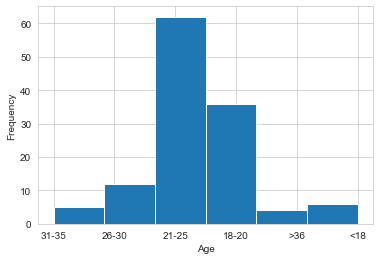

In [6]:
sns.set_style('whitegrid') # style
students['Age'].hist(bins=6) # number of bins for the x-axis
plt.rcParams.update({'font.size': 15}) # font size
plt.xlabel('Age') # label of x-axis
plt.ylabel('Frequency') # label of y-axis

Lists gender categories

In [7]:
pd.Series(students.Gender.unique())

0    M
1    F
dtype: object

Counts how many of each gender have enrolled in the courses.

In [8]:
students.Gender.value_counts()

F    63
M    62
Name: Gender, dtype: int64

Gender count is roughly equivalent.

Counts the number of people enrolled in each course

In [9]:
students['Course'].value_counts()

Business                          80
Law/Legal studies                 14
Social Sciences and Humanities    11
Art and Design                     7
Computing                          6
Science and engineering            4
Media and Communications           3
Name: Course, dtype: int64

Plots the number of people enrolled in each course, broken down by gender

<AxesSubplot:xlabel='count', ylabel='Course'>

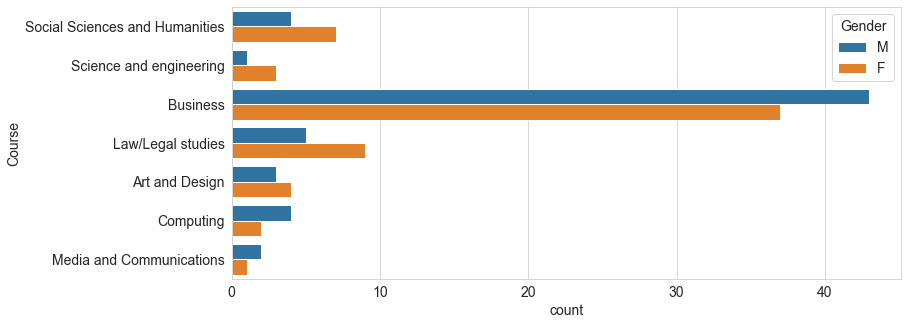

In [10]:
plt.figure(figsize=(12, 5))
plt.rcParams.update({'font.size': 14})
sns.countplot(y='Course', hue='Gender', data=students)

Students taking Business vastly outnumber students in other programs. There are slightly more males enrolled in the programme compared to females.

Checks number of unique nationalities.

In [11]:
pd.Series(students.Nationality.unique())

0                   Korea
1                   China
2                   Kenya
3                 Vietnam
4                   India
5            Saudi Arabia
6                Tanzania
7                    Oman
8                  Jordan
9                Zimbabwe
10               Portugal
11                Georgia
12              Singapore
13               Malaysia
14                  Qatar
15                 Turkey
16                 Kuwait
17                  OCEAN
18                     UK
19               Pakistan
20               Thailand
21              Indonesia
22    Trinidad and Tobago
23               Colombia
24                  Gongo
25                Ukraine
dtype: object

Counts students by Nationality

In [12]:
students['Nationality'].value_counts()

China                  77
Korea                   6
Saudi Arabia            6
Oman                    5
India                   3
Vietnam                 3
Qatar                   2
Kuwait                  2
Turkey                  2
Tanzania                2
Zimbabwe                2
Pakistan                1
Portugal                1
Gongo                   1
Malaysia                1
Jordan                  1
Indonesia               1
Kenya                   1
Singapore               1
Trinidad and Tobago     1
Colombia                1
OCEAN                   1
Georgia                 1
UK                      1
Thailand                1
Ukraine                 1
Name: Nationality, dtype: int64

Visualises student count by Nationality

<AxesSubplot:xlabel='count', ylabel='Nationality'>

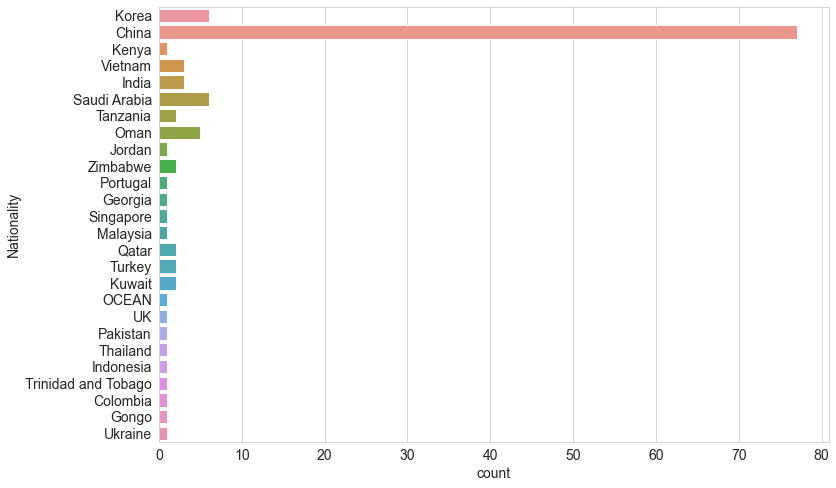

In [13]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 14})
sns.countplot(y='Nationality',data=students)

Most students appear to be from China.

Plots number of students enrolled in each program.

Text(0.5, 1.0, 'Program')

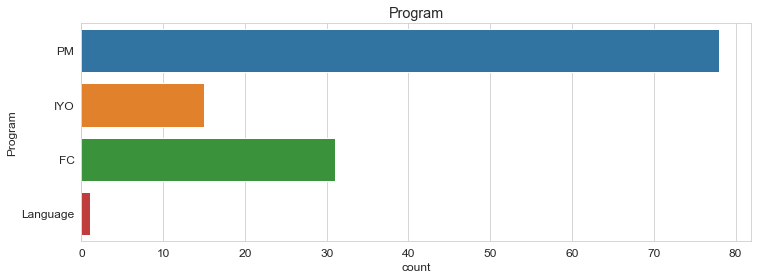

In [14]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Program',data=students)
plt.title('Program')

Plots Academic Performance of students.

Text(0.5, 1.0, 'Academic Performance')

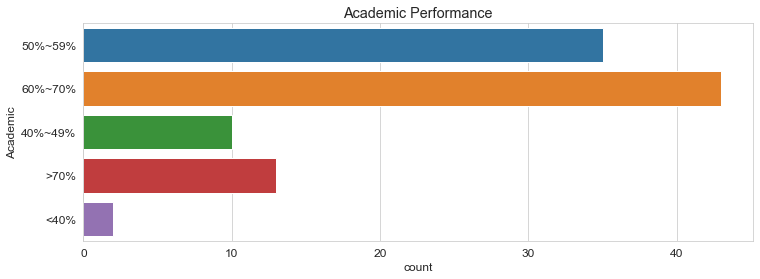

In [15]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Academic',data=students)
plt.title('Academic Performance')

Plot Attendance Levels of students

Text(0.5, 1.0, 'Attendance: S0 = highest attendance; S4 = lowest attendance')

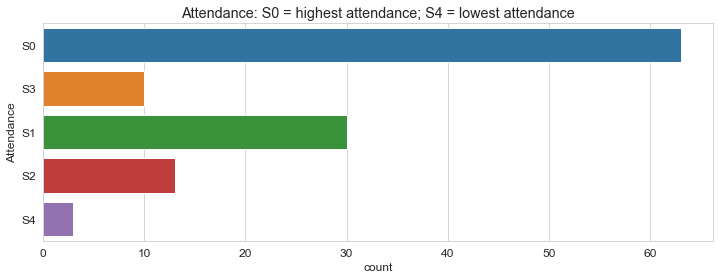

In [16]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Attendance',data=students)
plt.title('Attendance: S0 = highest attendance; S4 = lowest attendance')

## Time Management Questionnaire

The following plots depict gender differences for each questionnaire item. Value counts are shown for each unique label.

Item 6

In [17]:
pd.Series(students['6'].unique())

0           Disagree
1       Strong Agree
2            Neither
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You often feel that your life is aimless, with no definite purpose')

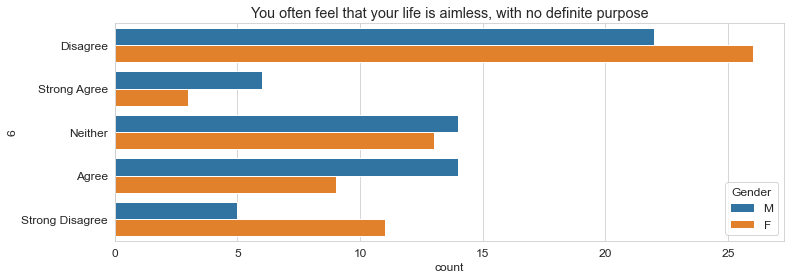

In [18]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='6',hue='Gender',data=students)
plt.title('You often feel that your life is aimless, with no definite purpose')

Item 7

In [19]:
pd.Series(students['7'].unique())

0              Agree
1       Strong Agree
2           Disagree
3            Neither
4    Strong Disagree
dtype: object

Text(0.5, 1.0, 'You never have trouble organising the things you have to do')

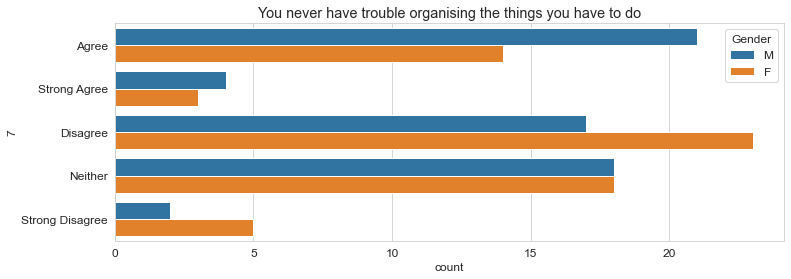

In [20]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='7',hue='Gender',data=students)
plt.title('You never have trouble organising the things you have to do')

Item 8

In [21]:
pd.Series(students['8'].unique())

0       Strong Agree
1            Neither
2              Agree
3    Strong Disagree
4           Disagree
5                NaN
dtype: object

Text(0.5, 1.0, "Once you've started an activity, you persist at it until you've completed it")

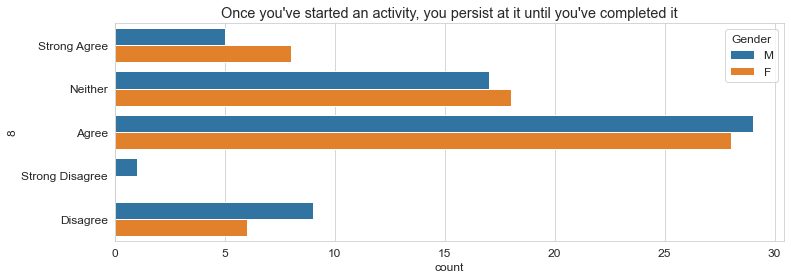

In [22]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='8',hue='Gender',data=students)
plt.title('Once you\'ve started an activity, you persist at it until you\'ve completed it')

Item 9

In [23]:
pd.Series(students['9'].unique())

0            Neither
1           Disagree
2              Agree
3       Strong Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, "Sometimes you feel that the things you have to do during the day just don't seem to matter")

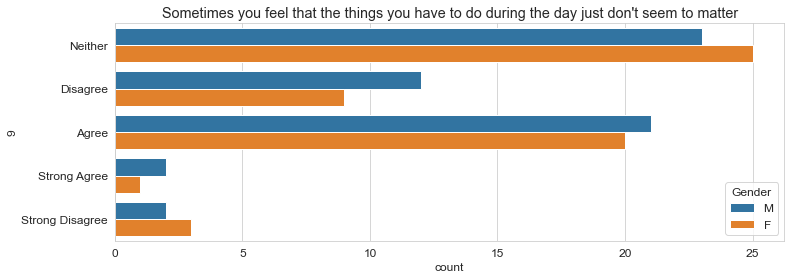

In [24]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='9',hue='Gender',data=students)
plt.title('Sometimes you feel that the things you have to do during the day just don\'t seem to matter')

Item 10

In [25]:
pd.Series(students['10'].unique())

0              Agree
1           Disagree
2            Neither
3       Strong Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You will plan your activities from day to day')

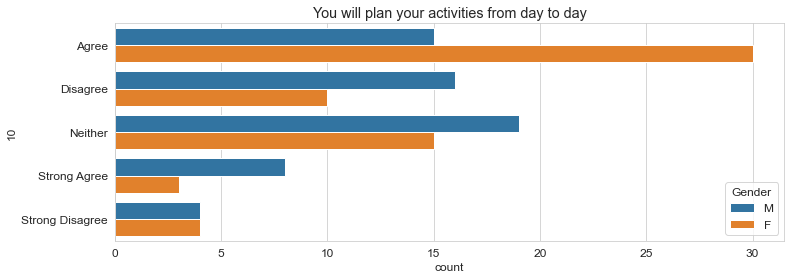

In [26]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='10',hue='Gender',data=students)
plt.title('You will plan your activities from day to day')

Item 11

In [27]:
pd.Series(students['11'].unique())

0            Neither
1              Agree
2           Disagree
3    Strong Disagree
4       Strong Agree
5                NaN
dtype: object

Text(0.5, 1.0, 'You tend to leave things to last minute')

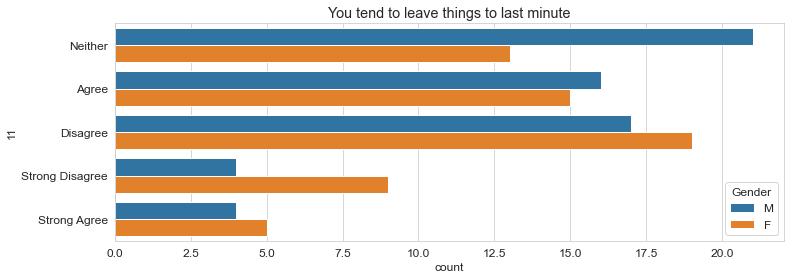

In [28]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='11',hue='Gender',data=students)
plt.title('You tend to leave things to last minute')

Item 12

In [29]:
pd.Series(students['12'].unique())

0           Disagree
1            Neither
2       Strong Agree
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You tend to change rather aimlessly from one activity to another during the day')

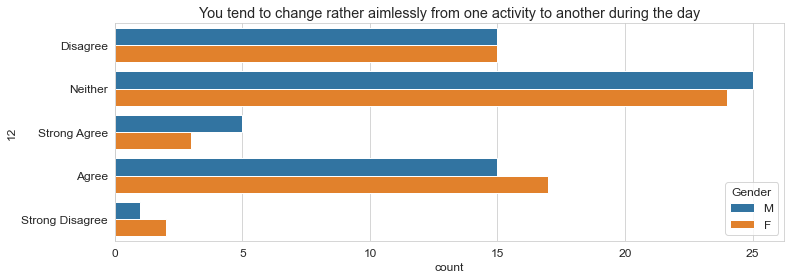

In [30]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='12',hue='Gender',data=students)
plt.title('You tend to change rather aimlessly from one activity to another during the day')

Item 13

In [31]:
pd.Series(students['13'].unique())

0    Strong Disagree
1            Neither
2              Agree
3           Disagree
4       Strong Agree
dtype: object

Text(0.5, 1.0, 'You give up the things that you were planning to do just because your friend says no')

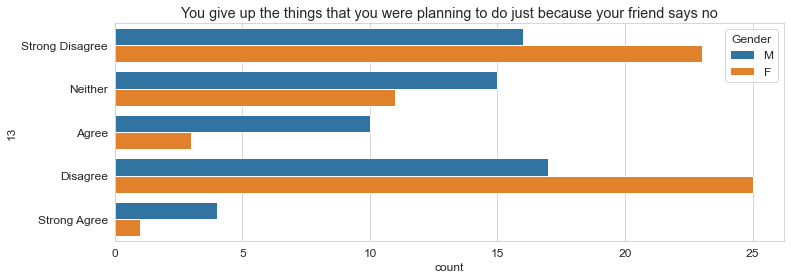

In [32]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='13',hue='Gender',data=students)
plt.title('You give up the things that you were planning to do just because your friend says no')

Item 14

In [33]:
pd.Series(students['14'].unique())

0       Strong Agree
1            Neither
2           Disagree
3              Agree
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You think you do enough with your time')

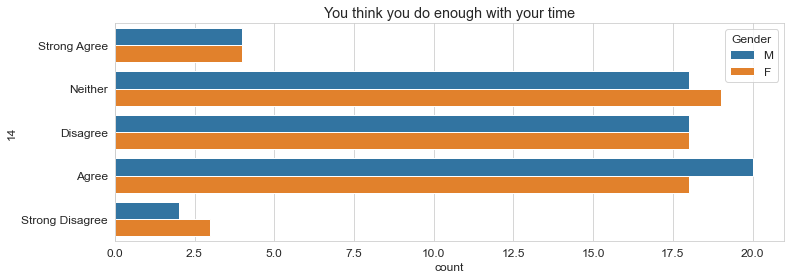

In [34]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='14',hue='Gender',data=students)
plt.title('You think you do enough with your time')

Item 15

In [35]:
pd.Series(students['15'].unique())

0            Neither
1              Agree
2       Strong Agree
3           Disagree
4    Strong Disagree
dtype: object

Text(0.5, 1.0, 'You are easy to get bored with your day-to-day activities')

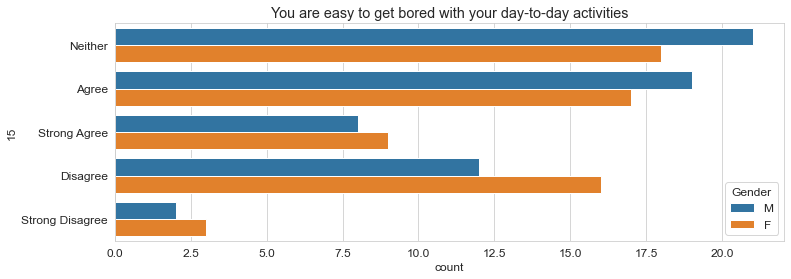

In [36]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='15',hue='Gender',data=students)
plt.title('You are easy to get bored with your day-to-day activities')

Item 16

In [37]:
pd.Series(students['16'].unique())

0           Disagree
1            Neither
2       Strong Agree
3    Strong Disagree
4              Agree
5                NaN
dtype: object

Text(0.5, 1.0, 'The important interests/activities in your life tend to change frequently')

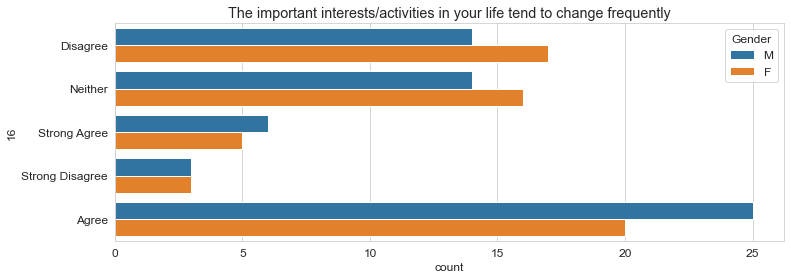

In [38]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='16',hue='Gender',data=students)
plt.title('The important interests/activities in your life tend to change frequently')

Item 17

In [39]:
pd.Series(students['17'].unique())

0              Agree
1           Disagree
2       Strong Agree
3            Neither
4    Strong Disagree
5                NaN
dtype: object

Text(0.5, 1.0, 'You know how much time you spend on each of the homework you do')

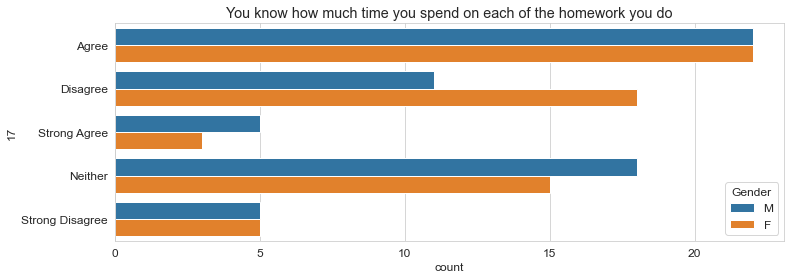

In [40]:
plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='17',hue='Gender',data=students)
plt.title('You know how much time you spend on each of the homework you do')

Plots the Academic marks by Attendence levels.

<AxesSubplot:xlabel='count', ylabel='Academic'>

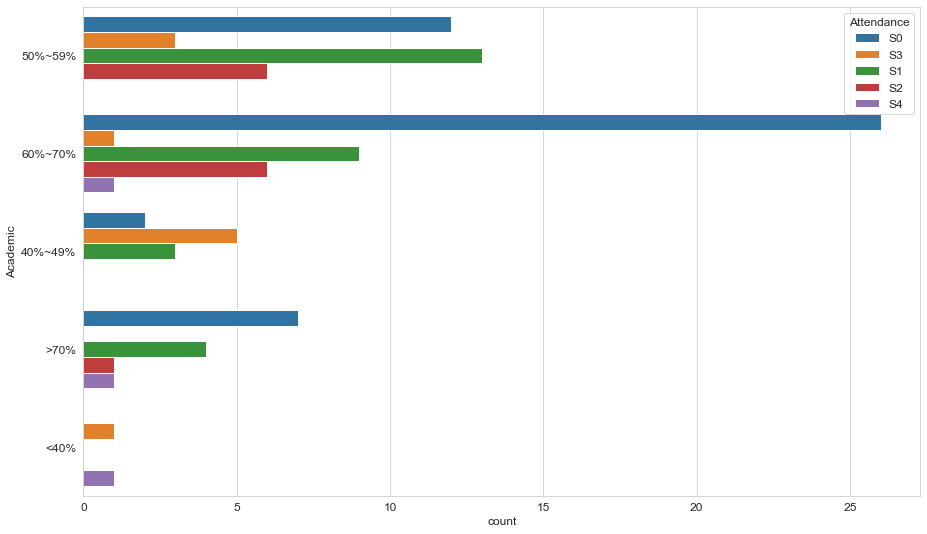

In [41]:
plt.figure(figsize=(15, 9))
plt.rcParams.update({'font.size': 12})
sns.countplot(y='Academic', hue='Attendance', data=students)

Lists unique values in Attendance column

In [42]:
pd.Series(students['Attendance'].unique())

0     S0
1     S3
2     S1
3     S2
4     S4
5    NaN
dtype: object

In [43]:
students['Attendance'].fillna('SRare', inplace=True)

In [44]:
students.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree


# Using PyCaret to perform Multi-Class Classification

From PyCaret documentation:
- The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

- When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

First, we need to split the data into seen and unseen sections. The seen portion will be used for training the model, and the unseen portion will be used during validation. 10% of the whole dataset will be sectioned off as unseen data.

In [45]:
data = students.sample(frac=0.9, random_state=786)
data_unseen = students.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

# Write .csv file for data_unseen. This file can be used with the Streamlit app to produce new predictions and visualise movement data.
data_unseen.to_csv(r'data_unseen.csv')

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (112, 21)
Unseen Data For Predictions: (13, 21)


Most of the output will not be relevant for this specific example but we can make sure that the target type is registered as "MultiClass" and that the labels are correctly recognised. We can also check for the presence of missing values and inspect our Training and Test set split. Additionally, we can enable normalisation so that the features are represented as Z-scores. This may help improve model performance, though PyCaret developers recommend running multiple experiments to examine if this is indeed the case. We could also have used the setup feature to remove one feature per pair of highly co-linear variables but in our case we have already removed all multicollinear variables above.

In [46]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'Attendance', session_id=123, ignore_features = ['Number', 'Gender', 'Nationality',])

,Description,Value
0,session_id,123
1,Target,Attendance
2,Target Type,Multiclass
3,Label Encoded,"S0: 0, S1: 1, S2: 2, S3: 3, S4: 4, SRare: 5"
4,Original Data,"(112, 21)"
5,Missing Values,True
6,Numeric Features,0
7,Categorical Features,17
8,Ordinal Features,False
9,High Cardinality Features,False


In [47]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.4893,0.0479,0.3475,0.4662,0.4568,0.2300,0.2621,0.0070
rf,Random Forest Classifier,0.4750,0.0417,0.2900,0.3317,0.3801,0.0897,0.1095,0.0870
gbc,Gradient Boosting Classifier,0.4625,0.0526,0.3625,0.4335,0.4277,0.1501,0.1552,0.1620
ada,Ada Boost Classifier,0.4607,0.0415,0.3350,0.3330,0.3577,0.1053,0.1155,0.0400
knn,K Neighbors Classifier,0.4482,0.0433,0.2500,0.3201,0.3537,0.0400,0.0647,0.0110
et,Extra Trees Classifier,0.4482,0.0395,0.2692,0.3229,0.3660,0.0562,0.0586,0.0740
catboost,CatBoost Classifier,0.4232,0.0460,0.2458,0.2930,0.3376,0.0113,0.0163,3.8400
lightgbm,Light Gradient Boosting Machine,0.4018,0.0339,0.2554,0.3246,0.3415,0.0546,0.0574,0.0310
lr,Logistic Regression,0.4000,0.0566,0.2837,0.3423,0.3519,0.0622,0.0536,0.3670
svm,SVM - Linear Kernel,0.3643,0.0000,0.3037,0.3550,0.3331,0.0515,0.0443,0.0190
